# 컨볼루션 신경망

## CIFAR-10 살펴보기
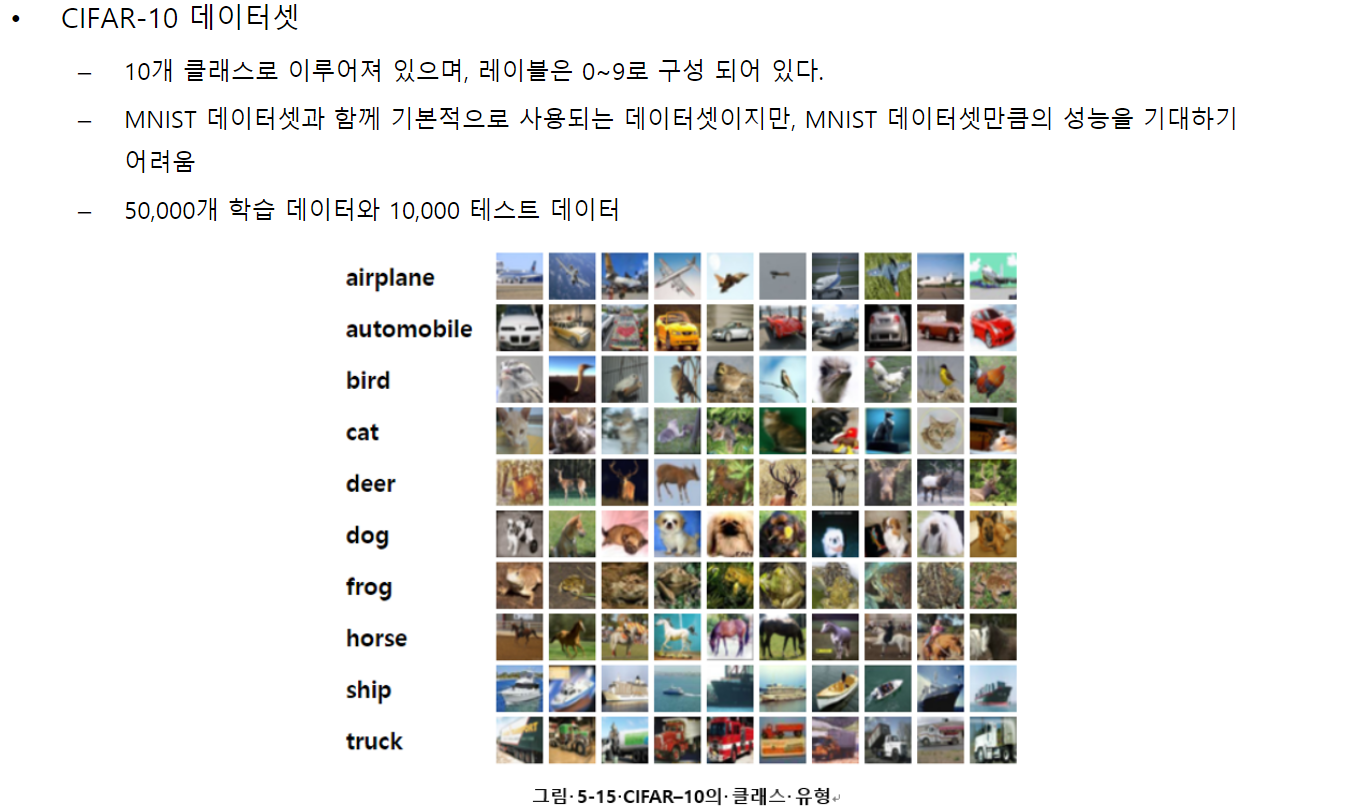

### 데이터 다운로드

In [1]:
from tensorflow.keras.datasets import cifar10

# 데이터를 다운받습니다.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


### 데이터 그려보기

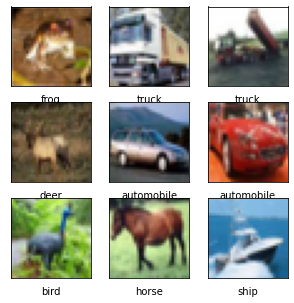

In [2]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

class_names = ['airplane', 'automobile', 'bird', 'cat',
              'deer', 'dog', 'frog', 'horse',
              'ship', 'truck']

sample_size = 9
random_idx = np.random.randint(60000, size=sample_size) 

plt.figure(figsize = (5, 5))
for i, idx in enumerate(random_idx):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.xlabel(class_names[int(y_train[i])])
plt.show()

### 전처리 
- 채널별로 평균과 표준편차를 구함

In [3]:
# 평균과 표준편차는 채널별로 구해줍니다.
x_mean = np.mean(x_train, axis = (0, 1, 2))
x_std = np.std(x_train, axis = (0, 1, 2))

x_train = (x_train - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_mean.shape

(3,)

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                  test_size = 0.3, random_state = 777)

print(x_train.shape, len(y_train))
print(x_val.shape, len(y_val))

(35000, 32, 32, 3) 35000
(15000, 32, 32, 3) 15000


## 신경망 학습시키기

### 모델 구성
- Conv2D, MaxPool2D

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

model = Sequential()
# (32, 32, 3)의 데이터를 입력으로 받습니다. 
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax')) # 10개의 출력을 가지는 신경망

- Adam(0.0001), sparse_categorical_crossentropy
- sparse_categorical_crossentropy는 0~9 형태로 되어있는 레이블을 그대로 사용할 수 있게 해줌


In [8]:
model.compile(optimizer = Adam(1e-4),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['acc'])

### 모델 학습하기

In [9]:
history = model.fit(x_train, y_train,
                    epochs = 30,
                    batch_size = 32,
                    validation_data = (x_val, y_val))

Epoch 1/30
1094/1094 [==============================] - 8s 5ms/step - loss: 1.6455 - acc: 0.4084 - val_loss: 1.3818 - val_acc: 0.4959
Epoch 2/30
1094/1094 [==============================] - 5s 4ms/step - loss: 1.2771 - acc: 0.5456 - val_loss: 1.1632 - val_acc: 0.5905
Epoch 3/30
1094/1094 [==============================] - 4s 4ms/step - loss: 1.0955 - acc: 0.6147 - val_loss: 1.1098 - val_acc: 0.6129
Epoch 4/30
1094/1094 [==============================] - 5s 4ms/step - loss: 0.9675 - acc: 0.6629 - val_loss: 0.9545 - val_acc: 0.6625
Epoch 5/30
1094/1094 [==============================] - 4s 4ms/step - loss: 0.8592 - acc: 0.7004 - val_loss: 0.9145 - val_acc: 0.6753
Epoch 6/30
1094/1094 [==============================] - 4s 4ms/step - loss: 0.7724 - acc: 0.7318 - val_loss: 0.8675 - val_acc: 0.6948
Epoch 7/30
1094/1094 [==============================] - 5s 4ms/step - loss: 0.6948 - acc: 0.7593 - val_loss: 0.8291 - val_acc: 0.7089
Epoch 8/30
1094/1094 [==============================] - 5s 4ms

### 학습 과정 그리기

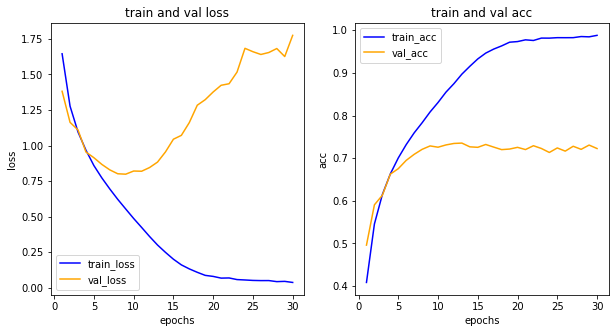

In [10]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

- 과대적합 문제 발생!
- 예방할 수 있는 방법을 알아보자   
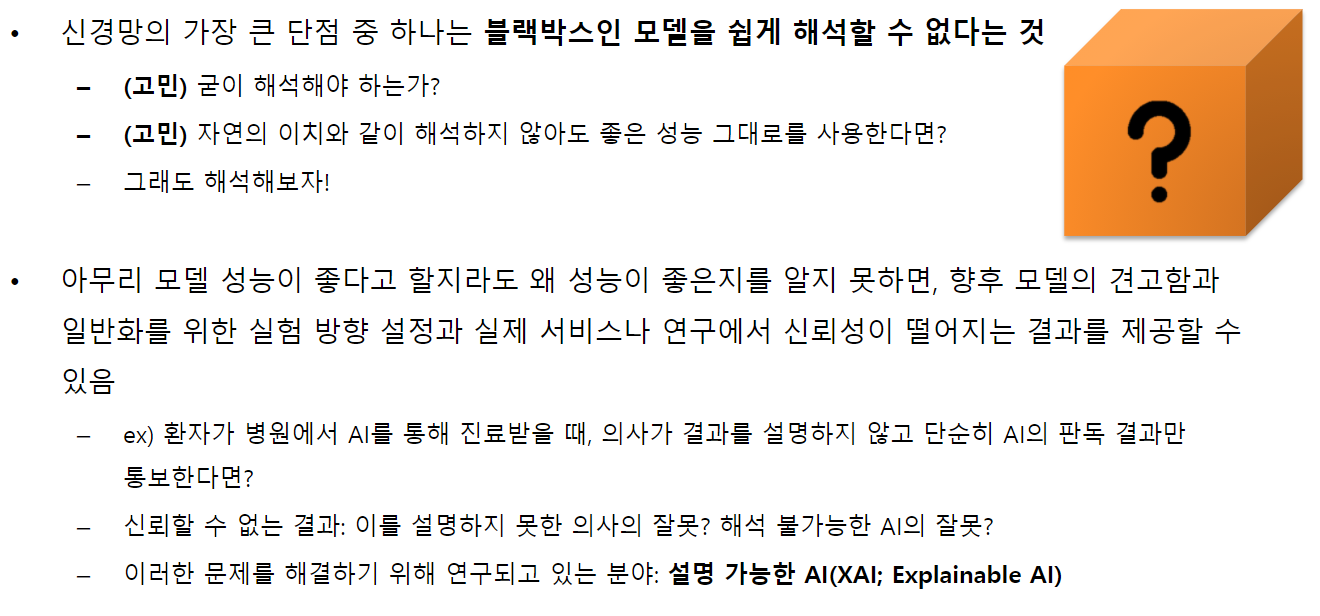


### 신경망 시각화해보기

In [11]:
import tensorflow as tf

get_layer_name = [layer.name for layer in model.layers]
get_output = [layer.output for layer in model.layers]

In [12]:
print('층 이름: ', get_layer_name)
print('출력 층 이름: ', get_output)

층 이름:  ['conv2d', 'conv2d_1', 'max_pooling2d', 'conv2d_2', 'conv2d_3', 'max_pooling2d_1', 'conv2d_4', 'conv2d_5', 'max_pooling2d_2', 'flatten', 'dense', 'dense_1']
출력 층 이름:  [<KerasTensor: shape=(None, 32, 32, 32) dtype=float32 (created by layer 'conv2d')>, <KerasTensor: shape=(None, 32, 32, 32) dtype=float32 (created by layer 'conv2d_1')>, <KerasTensor: shape=(None, 16, 16, 32) dtype=float32 (created by layer 'max_pooling2d')>, <KerasTensor: shape=(None, 16, 16, 64) dtype=float32 (created by layer 'conv2d_2')>, <KerasTensor: shape=(None, 16, 16, 64) dtype=float32 (created by layer 'conv2d_3')>, <KerasTensor: shape=(None, 8, 8, 64) dtype=float32 (created by layer 'max_pooling2d_1')>, <KerasTensor: shape=(None, 8, 8, 128) dtype=float32 (created by layer 'conv2d_4')>, <KerasTensor: shape=(None, 8, 8, 128) dtype=float32 (created by layer 'conv2d_5')>, <KerasTensor: shape=(None, 4, 4, 128) dtype=float32 (created by layer 'max_pooling2d_2')>, <KerasTensor: shape=(None, 2048) dtype=float32 (

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         7

In [14]:
visual_model = tf.keras.models.Model(inputs = model.input, outputs = get_output[0])
visual_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


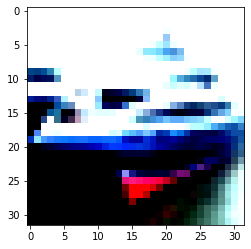

In [15]:
test_img = np.expand_dims(x_test[1], axis = 0)
feature_maps = visual_model.predict(test_img)
plt.imshow(test_img[0])

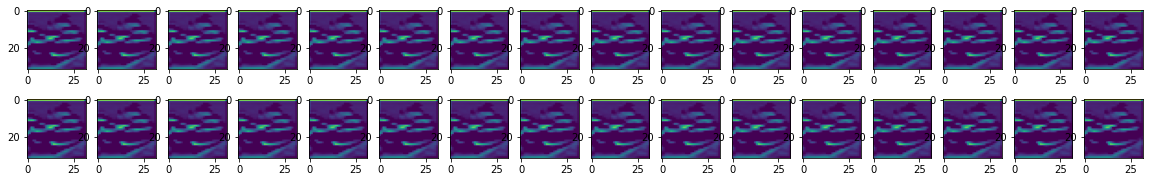

In [16]:
plt.figure(figsize=(20, 3))
cnt = 1
for x in range(32):
    plt.subplot(2, 16, cnt)
    plt.imshow(feature_maps[0][:, :, 0])
    cnt += 1

In [17]:
visual_model = tf.keras.models.Model(inputs = model.input, outputs = get_output)
test_img = np.expand_dims(x_test[1], axis = 0)
feature_maps = visual_model.predict(test_img)

In [18]:
print(x_test.shape)
print(test_img.shape)
print(feature_maps.shape)

(10000, 32, 32, 3)
(1, 32, 32, 3)


AttributeError: 'list' object has no attribute 'shape'

In [ ]:
# 모델 전체에서 output을 가져올 수 있습니다.
visual_model = tf.keras.models.Model(inputs = model.input, outputs = get_output)

# 테스트셋의 두 번째 데이터는 '배'입니다.
test_img = np.expand_dims(x_test[1], axis = 0)
feature_maps = visual_model.predict(test_img)

for layer_name, feature_map in zip(get_layer_name, feature_maps):
    # Dense 층은 제외합니다.
    if(len(feature_map.shape) == 4):
        img_size = feature_map.shape[1]
        features = feature_map.shape[-1]
        
        # (img_size, img_size)의 feature_map이 features 개수만큼 존재합니다.
        display_grid = np.zeros((img_size, img_size * features))
        
        # 각 특징맵을 display_grid 배열에 이어붙입니다.
        for i in range(features):
            x = feature_map[0, :, :, i]
            x -= x.mean(); x /= x.std()
            x *= 64; x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * img_size : (i + 1) * img_size] = x
            
        plt.figure(figsize = (features, 2 + 1./features))
        plt.title(layer_name, fontsize = 20)
        plt.grid(False)
        plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

visual_model = tf.keras.models,Model(inputs = model.input, outputs = get_output[0])
print(visual_model.summary())

test_img = np.expand_dims(test_images[0], axis = 0)
feature_maps = visual_model.predict(test_img)

plt.figure(figsize = (15, 3))
for cnt, x in enumerate(range(32)):
    plt.subplot(2, 16, cnt+1)
    plt.imshow(feature_maps[0][:,:,cnt], cmap='gray')